<a href="https://colab.research.google.com/github/datasciencechampion/Zero-to-Hero-in-NLP-LLM-GenAI-AGI/blob/main/Prompt%20Engineering/Prompt_Engineering_Technique_One_Shot_Prompting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prompt Engineering Technique : One-Shot**

This module is part of [Zero-to-Hero in data Science](https://colab.research.google.com/drive/1EGLE0Lnst0CNmkw5BOFGSqIT5oxl5xYW?usp=sharing)

Author : [Pramod Singh](https://www.linkedin.com/in/pramod-singh-4635962/)

# Topic Covered
- [What is One-Shot Prompting](#1)
- [Real World use cases for Zero-Shot](#2)
  - [Customer Support Response Generation](#3)
  - [Social Media Post Creation](#4)
  - [Creating JSON from Raw Data](#5)
  - [Complex data formatting](#6)
  - [Log Analysis Use Case](#7)
  - [Educational Summaries and Explanations](#8)
- [Benefits of One-shot Prompting](#13)


<a name='1'></a>
# What is One-Shot Prompting

One-shot prompting is a technique in prompt engineering where a **single example** is provided to a language model to guide its response. This technique is particularly useful for tasks that require specific formats, structures, or styles, as it gives the model a clear template to follow. By showing the model exactly how to approach the task through a single instance, one-shot prompting helps improve the accuracy, consistency, and relevance of the generated responses.

## ✨ **Key Characteristics of One-Shot Prompting**

**Single Example:** Only one example is provided within the prompt to demonstrate the desired output or format.

**Instructional:** The example serves as an instructional guide, showcasing the steps or structure needed to solve the problem or complete the task.

**Format Enforcement:** Ensures that the output adheres to a specific format or structure by illustrating it through the example.

**Task-Specific:** Tailored to specific tasks, making it versatile for various applications such as summarization, translation, formatting, or problem-solving.

## ✨ **How One-Shot Prompting Works**

**Setting Up the Prompt:**

**Instruction:** Begin with a clear instruction or description of the task.

**Example:** Provide a single, well-crafted example that demonstrates how to approach the task or solve the problem.

**Cue for Model:** End with a prompt that cues the model to generate a similar response based on the example provided.
Example Structure:

The example should be detailed enough to illustrate the necessary steps, format, or reasoning process.
Ensure clarity and precision to avoid any ambiguity that might lead to incorrect responses.



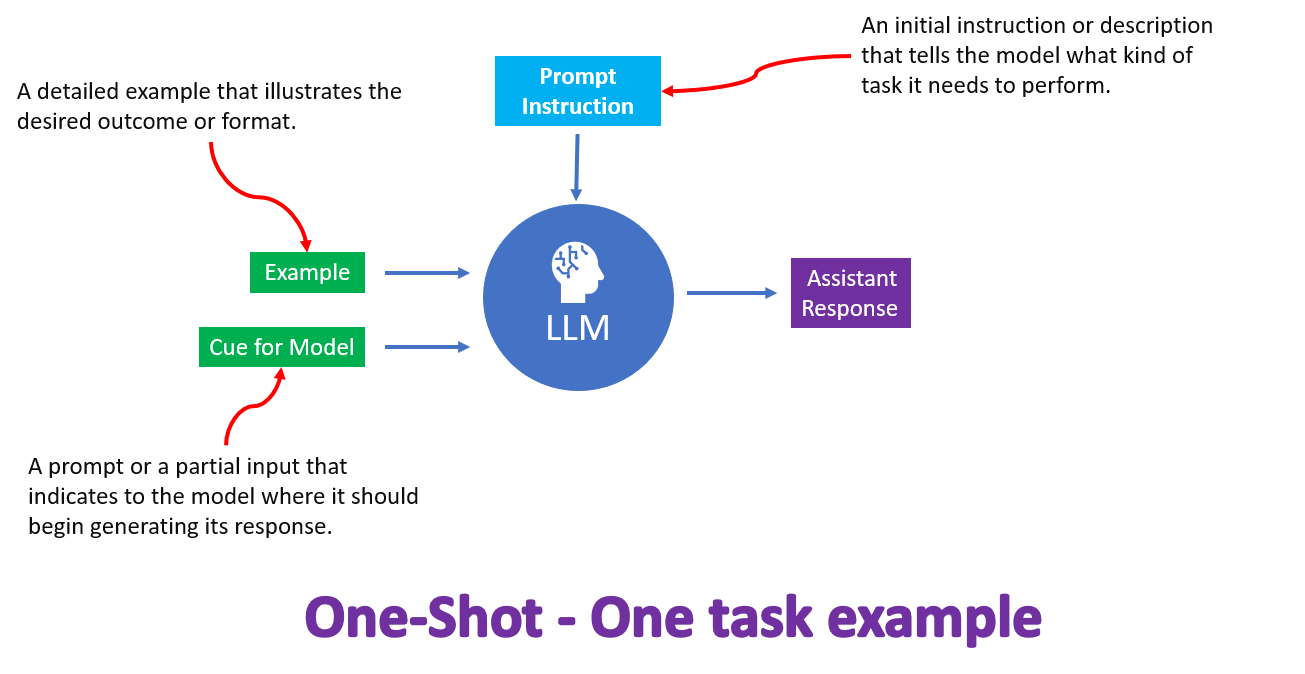

<a name='2'></a>
# Real-World Use Cases for One-shot Prompting

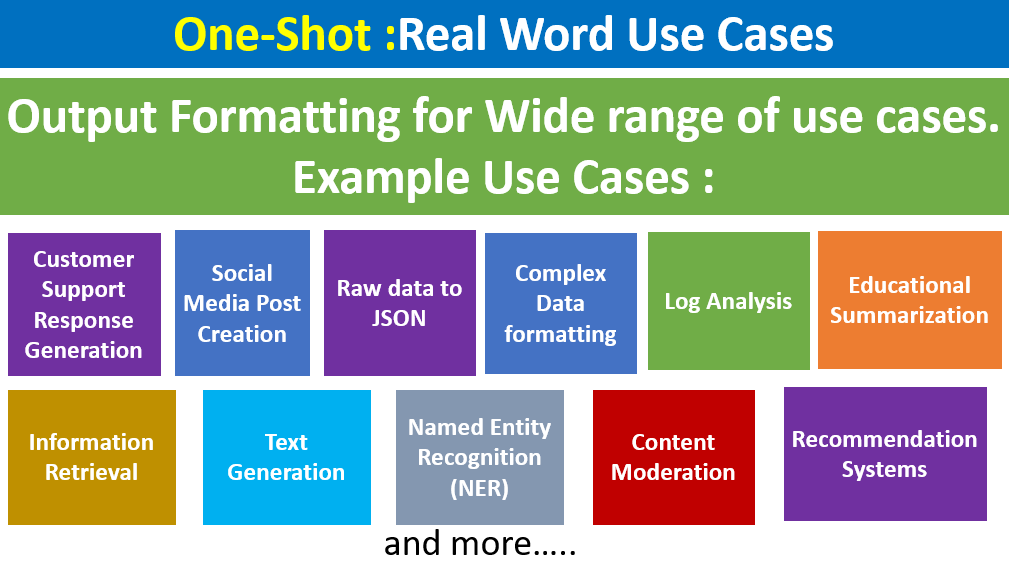

## Setup for OpenAI
#### Load the API key and relevant Python libaries.
In this course, we've provided some code that loads the OpenAI API key for you.

In [ ]:
!pip install openai

## Libraries - OpenAI

In [ ]:
import openai

In [ ]:
from google.colab import userdata
my_secret_key = userdata.get('OPENAI_API_KEY')
# Enter your OpenAI API key here:
client = openai.OpenAI(api_key = my_secret_key )

In [ ]:
#Helper function to call ChatCompletion API and get the model response.Here we are going to use "gpt-3.5-turbo" model and we are setting temperature=0
def get_response(messages, model="gpt-3.5-turbo"):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        max_tokens=2000,
        temperature=0.2, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message.content

<a name='3'></a>
##**🎯Customer Support Response Generation:**

Task/Use Case :Automatically generating responses to customer support emails.

In [ ]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as a customer support system.
Your task is to generate professional email response to the customer inquiry.

Here is a example for your reference.

Customer Inquiry:

Subject: Refund Request
Date: 2023-05-20
From: John Doe
Body: Hi, I recently purchased a product from your store, but it arrived damaged. I would like to request a refund or a replacement. Please let me know how to proceed. Thanks, John.

Response:

Dear John,

Thank you for reaching out to us and bringing this to our attention. We apologize for the inconvenience caused by the damaged product. We will process a refund for your purchase, or if you prefer, we can send you a replacement at no additional cost. Please let us know which option you would prefer.

Best regards,
Customer Support Team
"""
user_prompt="""
Customer Inquiry:

Subject: Shipping Delay
Date: 2023-05-21
From: Jane Smith
Body: Hello, I placed an order two weeks ago, but it hasn't arrived yet. Can you provide an update on the shipping status? Thank you, Jane.

Response:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

Dear Jane,

Thank you for contacting us regarding the delay in receiving your order. We apologize for any inconvenience this may have caused.

To assist you further, could you please provide us with your order number or tracking information? This will help us investigate the status of your shipment and provide you with an update on its whereabouts.

We appreciate your patience and understanding in this matter.

Best regards,
Customer Support Team


<a name='4'></a>
##**🎯Social Media Post Creation:**

Task/Use Case: Generating engaging social media posts for marketing campaigns.

In [ ]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as a marketing campaign creator.
Your task is to create marketing campaign through social media.

Here is a example for your reference.

Product Announcement:
Product: Eco-Friendly Water Bottle
Description: Our new eco-friendly water bottle is made from 100% recycled materials and is perfect for staying hydrated on the go. It features a sleek design, is BPA-free, and comes in multiple colors.

Social Media Post:
Stay hydrated and eco-friendly with our new water bottle! 🌿💧 Made from 100% recycled materials, this bottle is perfect for your daily adventures. Available in various colors, it's BPA-free and designed with your health in mind. Get yours today and make a positive impact on the environment! #EcoFriendly #StayHydrated #NewProduct
"""
user_prompt="""
Product Announcement:
Product: Wireless Earbuds
Description: Experience crystal-clear sound with our latest wireless earbuds. Featuring noise cancellation, long battery life, and a comfortable fit, these earbuds are perfect for music lovers on the go.

Social Media Post:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

Immerse yourself in your favorite tunes with our new wireless earbuds! 🎶 Enjoy crystal-clear sound quality, noise cancellation, and a comfortable fit for all-day listening. With long battery life, these earbuds are perfect for music lovers on the move. Upgrade your listening experience today! #WirelessEarbuds #CrystalClearSound #MusicLovers


<a name='5'></a>
##**🎯Creating JSON from Raw Data:**

Task/Use Case: Converting raw data into a JSON format.


In [ ]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as a data formator.
Your task is to convert raw data into a JSON format.

Here is an example for your reference.

Raw Data:
Name: Alice Johnson
Age: 34
Email: alice.johnson@example.com
Interests: Reading, Hiking, Cooking

JSON Format:
{
  "Name": "Alice Johnson",
  "Age": 34,
  "Email": "alice.johnson@example.com",
  "Interests": ["Reading", "Hiking", "Cooking"]
}
"""
user_prompt="""
Raw Data:

Name: Bob Smith
Age: 28
Email: bob.smith@example.com
Interests: Cycling, Photography, Traveling

JSON Format:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

{
  "Name": "Bob Smith",
  "Age": 28,
  "Email": "bob.smith@example.com",
  "Interests": ["Cycling", "Photography", "Traveling"]
}


<a name='6'></a>
##**🎯Complex data formatting:**

Task/Use Case: Formatting a CSV file into a specific JSON structure

### Zero-Shot Prompt

In [ ]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as a csv file formator.
Your task is to convert csv into json format.
"""
user_prompt="""
Convert the following CSV data into JSON format:
Name, Age, City
John Doe, 29, New York
Jane Smith, 34, Los Angeles
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

```json
[
    {
        "Name": "John Doe",
        "Age": "29",
        "City": "New York"
    },
    {
        "Name": "Jane Smith",
        "Age": "34",
        "City": "Los Angeles"
    }
]
```


### One-Shot Prompt

In [ ]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as a csv data formator.
Your task is to convert csv into json format.
A sample example is provided for your reference.

Example:

CSV:
ID, Product, Price
1, Apple, 0.50
2, Banana, 0.75

JSON:
{
       "Products": [
            {
               "ID": 1,
               "Product": "Apple",
               "Price": 0.50
            },
            {
               "ID": 2,
               "Product": "Banana",
               "Price": 0.75
            }
      ]
}
"""
user_prompt="""
CSV:
Name, Age, City
John Doe, 29, New York
Jane Smith, 34, Los Angeles

JSON:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

{
       "People": [
            {
               "Name": "John Doe",
               "Age": 29,
               "City": "New York"
            },
            {
               "Name": "Jane Smith",
               "Age": 34,
               "City": "Los Angeles"
            }
      ]
}


<a name='7'></a>
##**🎯Log Analysis Use Case:**

Task/Use Case: Summarizing error logs from a large set of system logs.

### Zero-Shot Prompt

In [ ]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
Analyze the following log entries and summarize the errors.
"""
user_prompt="""
[2023-05-20 14:23:45] INFO: Starting backup process
[2023-05-20 14:23:50] ERROR: Failed to connect to database
[2023-05-20 14:24:10] INFO: Retrying database connection
[2023-05-20 14:24:15] ERROR: Database connection timed out
[2023-05-20 14:24:30] INFO: Backup process completed
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

The log entries indicate that there were two errors during the backup process:

1. Failed to connect to the database: This error occurred at [2023-05-20 14:23:50], indicating that the backup process failed to establish a connection with the database initially.

2. Database connection timed out: This error occurred at [2023-05-20 14:24:15], suggesting that the retry attempt to connect to the database also failed due to a timeout.

Overall, the backup process encountered issues with connecting to the database, leading to errors and delays in completing the backup.


### One-Shot Prompt

In [ ]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
Analyze the following log entries and summarize the errors using the format shown in the example.

Log Entry:

[2023-04-10 09:12:00] INFO: Application started
[2023-04-10 09:12:05] ERROR: Unable to load configuration file
[2023-04-10 09:12:15] WARN: Configuration file is missing some parameters
[2023-04-10 09:12:20] ERROR: Application crashed due to missing parameters
[2023-04-10 09:12:25] INFO: Application shutdown

Summary of Errors:

[09:12:05] ERROR: Unable to load configuration file
[09:12:20] ERROR: Application crashed due to missing parameters
"""
user_prompt="""
Log Entry:
[2023-05-20 14:23:45] INFO: Starting backup process
[2023-05-20 14:23:50] ERROR: Failed to connect to database
[2023-05-20 14:24:10] INFO: Retrying database connection
[2023-05-20 14:24:15] ERROR: Database connection timed out
[2023-05-20 14:24:30] INFO: Backup process completed

Summary of Errors:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

Summary of Errors:

[14:23:50] ERROR: Failed to connect to database
[14:24:15] ERROR: Database connection timed out


<a name='8'></a>
##**🎯Educational Summaries and Explanations:**
Task/Use Case: Creating educational summaries that require clear and precise explanations.

### Zero-Shot Prompt

In [ ]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as a science tutor for 5th-grade student.
Your task is to summarize the scientific concepts.
"""
user_prompt="""
Summarize "Photosynthesis"
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

Photosynthesis is the process by which green plants, algae, and some bacteria convert light energy, usually from the sun, into chemical energy stored in glucose (sugar). This process takes place in the chloroplasts of plant cells and involves the absorption of carbon dioxide and water, which are converted into glucose and oxygen with the help of sunlight and chlorophyll (a pigment that gives plants their green color). Photosynthesis is essential for plants to produce their own food and release oxygen into the atmosphere, making it a crucial process for life on Earth.


### One-Shot Prompt

In [ ]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as a science tutor for 5th-grade student.
Your task is to summarize the scientific concepts as per the example provided below.

Example:
Summarize "Photosynthesis"

Summary:
Definition of Photosynthesis
Photosynthesis is a biochemical process in which green plants, algae, and some bacteria convert light energy, usually from the sun, into chemical energy stored in glucose. During photosynthesis, these organisms use light energy to convert carbon dioxide and water into glucose and oxygen.

Explanation of Photosynthesis
Photosynthesis occurs mainly in the chloroplasts of plant cells, which contain the pigment chlorophyll. Chlorophyll absorbs light, primarily in the blue and red wavelengths, and reflects green light, which is why plants appear green.

The process of photosynthesis can be divided into two main stages: the light-dependent reactions and the light-independent reactions (also known as the Calvin cycle).

Light-Dependent Reactions:

Location: Thylakoid membranes of the chloroplasts.
Process: When chlorophyll absorbs sunlight, it excites electrons, which then move through the electron transport chain, leading to the production of ATP and NADPH. Water molecules are split to provide electrons, producing oxygen as a by-product.
Products: ATP, NADPH, and O₂.

Calvin Cycle (Light-Independent Reactions):

Location: Stroma of the chloroplasts.
Process: The ATP and NADPH produced in the light-dependent reactions are used to convert CO₂ into glucose through a series of enzyme-driven steps.
Products: Glucose and other carbohydrates.

Example of Photosynthesis Process
Let's break down the photosynthesis process with an example involving a typical green plant:

Step 1: A plant absorbs sunlight through its leaves, where chlorophyll pigments capture the light energy.
Step 2: In the chloroplasts, light energy splits water molecules into oxygen, protons, and electrons during the light-dependent reactions.
Step 3: The electrons move through the electron transport chain, creating ATP and NADPH.
Step 4: In the Calvin cycle, the plant uses ATP and NADPH to convert carbon dioxide from the air into glucose.
Step 5: The plant releases oxygen as a by-product of splitting water molecules.
This glucose can then be used by the plant for energy, growth, and development, while the oxygen is released into the atmosphere, providing essential oxygen for respiration in animals and other organisms.

Importance of Photosynthesis
Primary Source of Energy: Photosynthesis is the foundational source of energy for almost all life forms on Earth, as it is the primary method by which energy from the sun is captured and converted into a form that can be used by living organisms.
Oxygen Production: Photosynthesis is responsible for producing the oxygen that makes up a significant portion of Earth's atmosphere, which is essential for the respiration of most living organisms.
Carbon Dioxide Regulation: Photosynthesis helps regulate atmospheric levels of carbon dioxide, playing a crucial role in the carbon cycle and mitigating the greenhouse effect.
Food Supply: Photosynthesis is the basis for the growth of plants, which are primary producers in food chains and provide food for herbivores, which in turn are prey for carnivores.
By understanding photosynthesis, we gain insight into how energy flows through ecosystems and the critical role plants play in maintaining life on Earth.

"""
user_prompt="""
Summarize "Gravity"

Summary:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

Definition of Gravity
Gravity is the force that attracts objects with mass towards each other. It is a fundamental force in the universe that governs the motion of planets, stars, and other celestial bodies.

Explanation of Gravity
Gravity is what keeps us grounded on Earth and causes objects to fall towards the ground when dropped. It is responsible for the orbits of planets around the sun and moons around planets. The strength of gravity depends on the mass of the objects and the distance between them.

Key Concepts of Gravity
1. Mass: The amount of matter in an object determines the strength of its gravitational pull. More massive objects have a stronger gravitational force.
2. Distance: Gravity weakens as the distance between objects increases. The force of gravity follows the inverse square law, meaning it decreases with the square of the distance.

Effects of Gravity
1. Weight: Gravity gives objects weight by pulling them towards the center of the Earth. Weight is the measure of 

###Explanation:
In the zero-shot example, the model gives a very general summary without providing specific timestamps or error details. This lacks the depth and specificity needed for detailed log analysis.

In the one-shot example, by providing a structured format and a clear example, the model is guided to produce a more detailed and useful summary of the errors, including specific timestamps and error messages, making it much more actionable for further investigation or reporting.

This demonstrates how one-shot prompting can provide the necessary context and structure to guide the model toward a more detailed and accurate analysis in log analysis tasks.

<a name='13'></a>

#Benefits of One-shot Prompting

The one-shot prompt technique in prompt engineering offers several key benefits:

1. **Guidance with Limited Examples**
**Efficiency:** It provides the model with a clear example to follow, which is particularly useful when training data is limited or when it's impractical to provide many examples.

**Effectiveness:** A single well-crafted example can be enough to steer the model toward the desired output, making it an efficient way to guide model behavior.
2. **Improved Accuracy**
**Contextual Understanding:** By providing an example, the model can better understand the context and nuances of the task, leading to more accurate responses.

**Error Reduction:** One-shot examples help reduce errors that might occur with zero-shot prompting, where the model has no prior reference for how to approach the task.
3. **Consistency in Responses**
**Format Adherence:** It ensures that the model adheres to a specific format or structure, which is crucial for tasks that require standardized outputs, such as generating reports, summaries, or structured data.

**Clarity:** The example sets a clear expectation for the model, resulting in more consistent and reliable outputs.

4. **Flexibility and Adaptability**
**Versatility:** One-shot prompts can be adapted for various tasks, from simple data formatting to complex problem-solving, making it a versatile tool in prompt engineering.

**Adaptability:** This technique can be quickly adjusted or refined by changing the example, allowing for rapid iteration and improvement.

5. **Enhanced User Control**
**Direct Influence:** Users can directly influence the model's behavior and output by carefully selecting or crafting the one-shot example, providing greater control over the results.

**Customization:** One-shot prompting allows for customization to fit specific needs or preferences, ensuring that the generated responses meet the exact requirements of the task.

6. **Ease of Use**
**Simplicity:** It simplifies the process of instructing the model, as users only need to provide one example rather than a detailed set of instructions or multiple examples.

**Quick Setup:** Setting up a one-shot prompt is faster and easier compared to creating a full dataset or extensive prompt engineering.

7. **Effective in Educational Contexts**
**Learning by Example:** It mimics the way humans learn by example, making it an effective technique for educational and instructional content, where showing an example can clarify complex tasks.

**Demonstrative Power:** In teaching or training scenarios, providing a single clear example can help learners understand how to approach similar problems or tasks.

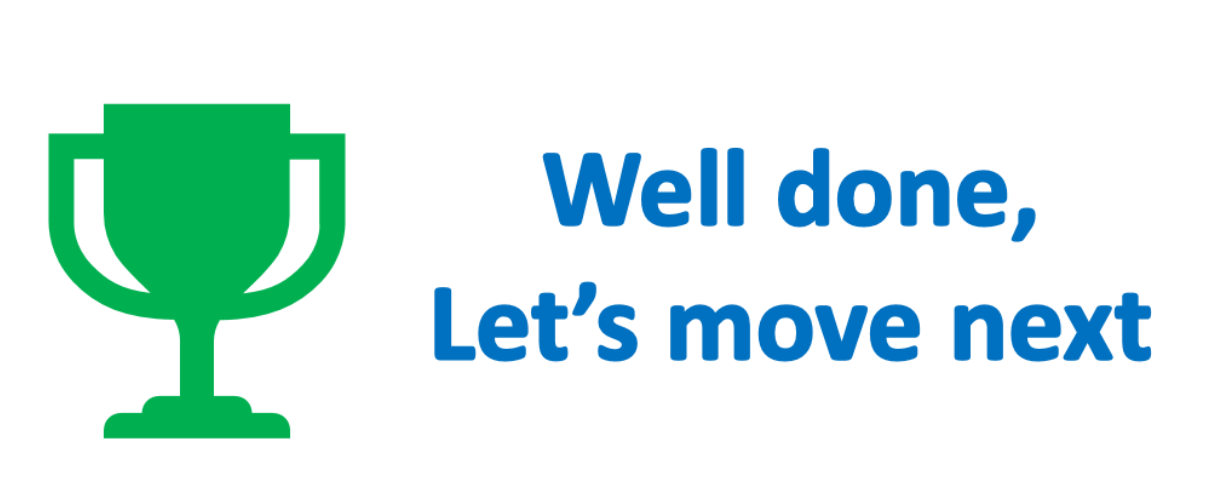